In [48]:
import math
from abc import abstractmethod

import numpy as np
import torch
import torch as th
import torch.nn as nn
import torch.nn.functional as F
from einops import repeat

In [49]:
from abc import ABC, abstractmethod
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support

import torch
import torch.nn as nn
import torch.nn.functional as F
import math
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [50]:
from abc import ABC, abstractmethod
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support

import torch
import torch.nn as nn
import torch.nn.functional as F
import math
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [51]:
import os
import pandas as pd

def load_ppg_data(path):
    data_list = []

    # 디렉토리 내 모든 파일을 순회
    for file in os.listdir(path):
        file_path = os.path.join(path, file)
        
        # 파일인지 확인
        if os.path.isfile(file_path):
            try:
                # 파일 이름에서 끝자리 숫자 추출 (정수 변환)
                subject_number = int(''.join(filter(str.isdigit, file.split('.')[-2])))
                
                # 파일 데이터 읽기 (여기서는 CSV 형식 가정)
                df = pd.read_csv(file_path, header=None, names=['PPG'])
                
                # subject 컬럼 추가
                df['subject'] = subject_number
                
                # 리스트에 추가
                data_list.append(df)

            except ValueError:
                print(f"파일 이름에서 숫자를 추출할 수 없습니다: {file}")
            except Exception as e:
                print(f"파일 {file} 처리 중 오류 발생: {e}")

    # 데이터프레임 병합
    if data_list:
        final_df = pd.concat(data_list, ignore_index=True)
    else:
        final_df = pd.DataFrame(columns=['PPG', 'subject'])

    return final_df

# 사용 예시
path = "E:\dataset\PPG_BP_assessment\Dataset\PPG_csv"
df = load_ppg_data(path)
df

<>:40: SyntaxWarning: invalid escape sequence '\d'
<>:40: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_2448\3832726767.py:40: SyntaxWarning: invalid escape sequence '\d'
  path = "E:\dataset\PPG_BP_assessment\Dataset\PPG_csv"


,PPG,subject
0,0.493164,1
1,0.473633,1
2,0.454102,1
3,0.439453,1
4,0.429688,1
...,...,...
707925,1.240234,56
707926,1.269531,56
707927,1.298828,56
707928,1.328125,56


In [52]:
df['subject'].value_counts()

subject
29    36522
12    12321
53    12321
8     12321
6     12318
9     12305
17    12292
54    12287
28    12287
1     12287
13    12285
43    12285
33    12280
22    12279
46    12278
37    12278
39    12278
27    12278
41    12278
44    12278
34    12278
20    12278
19    12278
51    12278
32    12278
50    12277
40    12277
36    12277
18    12275
42    12268
7     12268
3     12259
56    12242
24    12242
2     12239
14    12238
30    12193
31    12172
38    12168
4     12151
45    12132
26    12132
52    12119
10    12119
47    12115
5     12115
11    12086
48    12085
15    12085
49    12041
25    12041
21    12025
16    12001
23    11952
55    11952
35    11936
Name: count, dtype: int64

In [56]:
# 사용자별로 첫 번째 주기 시작점부터 11,000개까지 자르기
# 주기 시작점은 첫 번째 피크로 정의

final_dfs_aligned = []

for subject_id, group in df.groupby('subject'):
    ppg = group['PPG'].values
    peaks = extract_cycles(ppg, distance=50)
    
    if len(peaks) == 0:
        continue  # 피크가 없으면 스킵
    
    start_idx = peaks[0]
    end_idx = start_idx + max_total_samples
    trimmed_group = group.iloc[start_idx:end_idx].copy()
    
    final_dfs_aligned.append(trimmed_group)

# 최종 결합
df_filtered = pd.concat(final_dfs_aligned, axis=0).reset_index(drop=True)


In [57]:
df_filtered['subject'].value_counts()

subject
1     11000
2     11000
31    11000
32    11000
33    11000
34    11000
35    11000
36    11000
37    11000
38    11000
39    11000
40    11000
41    11000
42    11000
43    11000
44    11000
45    11000
46    11000
47    11000
48    11000
49    11000
50    11000
51    11000
52    11000
53    11000
54    11000
55    11000
30    11000
29    11000
28    11000
14    11000
3     11000
4     11000
5     11000
6     11000
7     11000
8     11000
9     11000
10    11000
11    11000
12    11000
13    11000
15    11000
27    11000
16    11000
17    11000
18    11000
19    11000
20    11000
21    11000
22    11000
23    11000
24    11000
25    11000
26    11000
56    11000
Name: count, dtype: int64

In [58]:
df_filtered.to_csv("E:\dataset\PPG_BP_assessment\Filtered_PPG_Data.csv", index=False)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_2448\1988435351.py:1: SyntaxWarning: invalid escape sequence '\d'
  df_filtered.to_csv("E:\dataset\PPG_BP_assessment\Filtered_PPG_Data.csv", index=False)


In [59]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616000 entries, 0 to 615999
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   PPG      616000 non-null  float64
 1   subject  616000 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 9.4 MB


<>:23: SyntaxWarning: invalid escape sequence '\d'
<>:23: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_2448\910736116.py:23: SyntaxWarning: invalid escape sequence '\d'
  plt.savefig("E:\dataset\PPG_BP_assessment\ppg_per_subject.png", dpi=300)


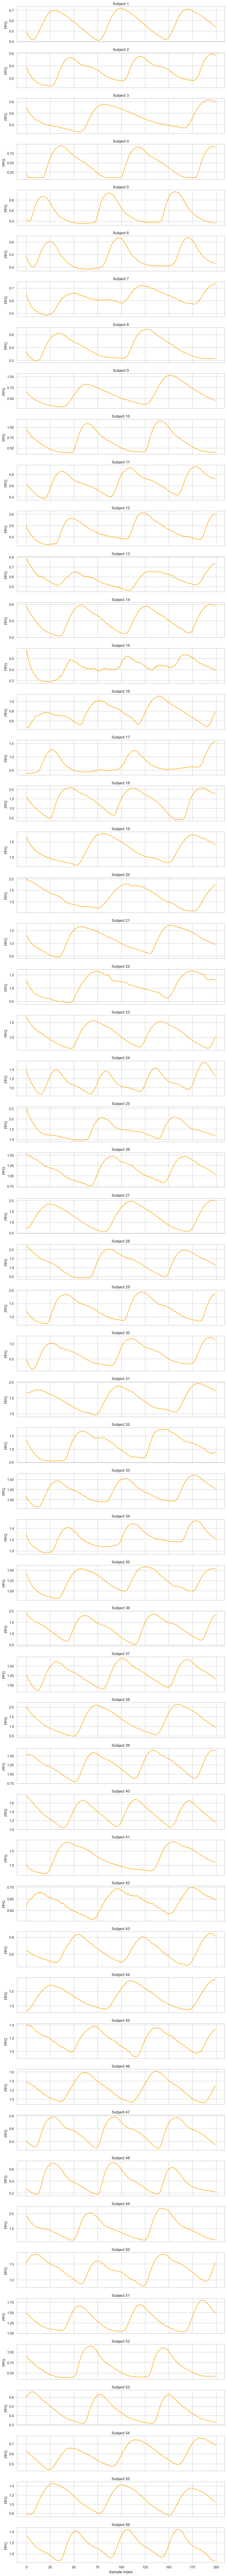

<Figure size 640x480 with 0 Axes>

In [63]:
# 고유 사용자 ID 확인
subject_ids = sorted(new_df['subject'].unique())

# 사용자별 200개 샘플 시각화
import matplotlib.pyplot as plt

ppg_columns = [f'PPG{i}' for i in range(1, 201)]  # PPG1 ~ PPG200 컬럼명 리스트 생성
num_subjects = len(subject_ids)
fig, axes = plt.subplots(num_subjects, 1, figsize=(10, num_subjects * 2), sharex=True)

for i, subject_id in enumerate(subject_ids):
    subject_row = new_df[new_df['subject'] == subject_id].iloc[0]  # 해당 subject의 첫 번째 샘플 선택
    subject_signal = subject_row[ppg_columns].values
    axes[i].plot(subject_signal, color='orange')
    axes[i].set_ylabel("PPG")
    axes[i].set_title(f"Subject {subject_id}")
    axes[i].grid(True)

axes[-1].set_xlabel("Sample Index")
plt.tight_layout()
plt.show()

plt.savefig("E:\dataset\PPG_BP_assessment\ppg_per_subject.png", dpi=300)

In [64]:
import pandas as pd

def reshape_ppg_dataframe(df, window_size=200):
    # 결과 저장 리스트
    result = []

    # subject별로 처리
    for subject_id, group in df.groupby('subject'):
        ppg_values = group['PPG'].values
        total_len = len(ppg_values)

        # window_size보다 작으면 건너뜀
        if total_len < window_size:
            continue

        # window_size로 나눠떨어지는 최대 길이까지 처리
        max_valid_length = (total_len // window_size) * window_size
        for i in range(0, max_valid_length, window_size):
            window = ppg_values[i:i+window_size]
            row = {f'PPG{j+1}': window[j] for j in range(window_size)}
            row['subject'] = subject_id
            result.append(row)

    return pd.DataFrame(result)

# 사용 예시: 윈도우 크기를 지정
new_df = reshape_ppg_dataframe(df_filtered, window_size=200)

In [65]:
new_df.shape

(3080, 201)

In [66]:
# 조건에 따라 Hypertension 값 할당
#hypertension_0 = {2, 5, 6, 10, 11, 12, 15, 19, 22, 24, 25, 28, 30, 40, 47, 48, 49, 50, 51}
hypertension_0 = {2, 10, 11, 12, 15, 19, 22, 24, 25, 28, 30, 40, 47, 48, 49, 50}
hypertension_2 = {7, 8, 13, 14, 16, 18, 20, 26, 27, 35, 41, 42, 43, 44, 45, 46}
hypertension_1 = {1, 3, 4, 9, 17, 21, 23, 29, 31, 32, 33, 34, 36, 37, 38, 39, 52, 53, 54, 55, 56}

new_df.loc[new_df['subject'].isin(hypertension_0), 'Hypertension'] = 0
new_df.loc[new_df['subject'].isin(hypertension_2), 'Hypertension'] = 2
new_df.loc[new_df['subject'].isin(hypertension_1), 'Hypertension'] = 1

# 결과 출력
new_df['Hypertension'].value_counts()

Hypertension
1.0    1155
0.0     880
2.0     880
Name: count, dtype: int64

In [67]:
# 조건에 따라 데이터 분할
train_df = new_df[new_df['subject'].isin(train_subjects)]
test_df = new_df[~new_df['subject'].isin(train_subjects)]

In [68]:
train_df

,PPG1,PPG2,PPG3,PPG4,PPG5,PPG6,PPG7,PPG8,PPG9,PPG10,...,PPG193,PPG194,PPG195,PPG196,PPG197,PPG198,PPG199,PPG200,subject,Hypertension
55,0.532227,0.527344,0.527344,0.522461,0.512695,0.502930,0.488281,0.473633,0.463867,0.449219,...,0.244141,0.234375,0.219727,0.214844,0.209961,0.200195,0.200195,0.195312,2,0.0
56,0.190430,0.185547,0.185547,0.180664,0.175781,0.175781,0.175781,0.175781,0.180664,0.195312,...,0.424805,0.424805,0.429688,0.429688,0.424805,0.429688,0.424805,0.415039,2,0.0
57,0.415039,0.405273,0.395508,0.380859,0.375977,0.366211,0.356445,0.346680,0.332031,0.322266,...,0.546875,0.556641,0.566406,0.571289,0.576172,0.576172,0.576172,0.571289,2,0.0
58,0.566406,0.556641,0.546875,0.537109,0.527344,0.512695,0.507812,0.493164,0.483398,0.473633,...,0.258789,0.253906,0.253906,0.249023,0.249023,0.249023,0.244141,0.244141,2,0.0
59,0.244141,0.244141,0.253906,0.268555,0.288086,0.317383,0.341797,0.380859,0.405273,0.434570,...,0.444336,0.434570,0.429688,0.424805,0.415039,0.410156,0.400391,0.385742,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,1.215820,1.196289,1.171875,1.152344,1.127930,1.108398,1.083984,1.059570,1.044922,1.020508,...,1.230469,1.289062,1.347656,1.396484,1.435547,1.479492,1.508789,1.538086,40,0.0
2196,1.562500,1.572266,1.586914,1.582031,1.582031,1.577148,1.552734,1.542969,1.518555,1.499023,...,1.279297,1.259766,1.240234,1.215820,1.201172,1.176758,1.157227,1.137695,40,0.0
2197,1.113281,1.098633,1.074219,1.049805,1.030273,1.010742,0.991211,0.966797,0.952148,0.947266,...,1.435547,1.474609,1.508789,1.533203,1.552734,1.567383,1.572266,1.572266,40,0.0
2198,1.567383,1.547852,1.538086,1.518555,1.494141,1.474609,1.440430,1.425781,1.401367,1.376953,...,1.171875,1.157227,1.132812,1.113281,1.093750,1.064453,1.044922,1.025391,40,0.0


In [69]:
train_df.columns

Index(['PPG1', 'PPG2', 'PPG3', 'PPG4', 'PPG5', 'PPG6', 'PPG7', 'PPG8', 'PPG9',
       'PPG10',
       ...
       'PPG193', 'PPG194', 'PPG195', 'PPG196', 'PPG197', 'PPG198', 'PPG199',
       'PPG200', 'subject', 'Hypertension'],
      dtype='object', length=202)

In [70]:
train_df['Hypertension'].value_counts()

Hypertension
0.0    660
Name: count, dtype: int64

In [71]:
test_df['Hypertension'].value_counts()

Hypertension
1.0    1155
2.0     880
0.0     220
Name: count, dtype: int64

In [72]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import math

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def timestep_embedding(timesteps, dim, max_period=1000, repeat_only=False):
    """
    Create sinusoidal timestep embeddings.
    :param timesteps: a 1-D Tensor of N indices, one per batch element.
                        These may be fractional.
    :param dim: the dimension of the output.
    :param max_period: controls the minimum frequency of the embeddings.
    :return: an [N x dim] Tensor of positional embeddings.
    """
    if not repeat_only:
        half = dim // 2
        freqs = torch.exp(
            -math.log(max_period)
            * torch.arange(start=0, end=half, dtype=torch.float32)
            / half
        ).to(device=timesteps.device)
        args = timesteps[:, None].float() * freqs[None]
        embedding = torch.cat([torch.cos(args), torch.sin(args)], dim=-1)
        if dim % 2:
            embedding = torch.cat(
                [embedding, torch.zeros_like(embedding[:, :1])], dim=-1
            )
    else:
        embedding = repeat(timesteps, "b -> b d", d=dim)
    return embedding


def zero_module(module):
    """
    Zero out the parameters of a module and return it.
    """
    for p in module.parameters():
        p.detach().zero_()
    return module


class TimestepBlock(nn.Module):
    def forward(self, x, emb):
        """
        Apply the module to `x` given `emb` timestep embeddings.
        """
        raise NotImplementedError

class TimestepEmbedSequential(nn.Sequential, TimestepBlock):
    """
    A sequential module that passes timestep embeddings to the children that
    support it as an extra input.
    """

    def forward(self, x, emb, context=None):
        for layer in self:
            if isinstance(layer, TimestepBlock):
                x = layer(x, emb)  # Pass emb to TimestepBlock layers
            else:
                x = layer(x)  # Regular layers do not receive emb
        return x

def Normalize(in_channels):
    return nn.GroupNorm(
        num_groups=32, num_channels=in_channels, eps=1e-6, affine=True
    )


def count_flops_attn(model, _x, y):
    """
    A counter for the `thop` package to count the operations in an
    attention operation.
    Meant to be used like:
        macs, params = thop.profile(
            model,
            inputs=(inputs, timestamps),
            custom_ops={QKVAttention: QKVAttention.count_flops},
        )
    """
    b, c, *spatial = y[0].shape
    num_spatial = int(np.prod(spatial))
    # We perform two matmuls with the same number of ops.
    # The first computes the weight matrix, the second computes
    # the combination of the value vectors.
    matmul_ops = 2 * b * (num_spatial**2) * c
    model.total_ops += th.DoubleTensor([matmul_ops])


class QKVAttentionLegacy(nn.Module):
    """
    A module which performs QKV attention.
    Matches legacy QKVAttention + input/ouput heads shaping
    """

    def __init__(self, n_heads):
        super().__init__()
        self.n_heads = n_heads

    def forward(self, qkv):
        """
        Apply QKV attention.
        :param qkv: an [N x (H * 3 * C) x T] tensor of Qs, Ks, and Vs.
        :return: an [N x (H * C) x T] tensor after attention.
        """
        bs, width, length = qkv.shape
        assert width % (3 * self.n_heads) == 0
        ch = width // (3 * self.n_heads)
        q, k, v = qkv.reshape(bs * self.n_heads, ch * 3, length).split(
            ch, dim=1
        )
        scale = 1 / math.sqrt(math.sqrt(ch))
        weight = torch.einsum(
            "bct,bcs->bts", q * scale, k * scale
        )  # More stable with f16 than dividing afterwards
        weight = torch.softmax(weight.float(), dim=-1).type(weight.dtype)
        a = torch.einsum("bts,bcs->bct", weight, v)
        return a.reshape(bs, -1, length)

    @staticmethod
    def count_flops(model, _x, y):
        return count_flops_attn(model, _x, y)


class AttentionBlock(nn.Module):
    """
    An attention block that allows spatial positions to attend to each other.
    Originally ported from here, but adapted to the N-d case.
    https://github.com/hojonathanho/diffusion/blob/1e0dceb3b3495bbe19116a5e1b3596cd0706c543/diffusion_tf/models/unet.py#L66.
    """

    def __init__(
        self,
        channels,
        num_heads=1,
        num_head_channels=-1,
        use_checkpoint=False,
    ):
        super().__init__()
        self.channels = channels
        if num_head_channels == -1:
            self.num_heads = num_heads
        else:
            assert channels % num_head_channels == 0, (
                f"q,k,v channels {channels} is "
                f"not divisible by num_head_channels {num_head_channels}"
            )
            self.num_heads = channels // num_head_channels
        self.use_checkpoint = use_checkpoint
        self.norm = Normalize(channels)
        self.qkv = nn.Conv1d(channels, channels * 3, 1)
        self.attention = QKVAttentionLegacy(self.num_heads)

        self.proj_out = zero_module(nn.Conv1d(channels, channels, 1))

    def forward(self, x):
        return self._forward(
            x,
        )

    def _forward(self, x):
        b, c, *spatial = x.shape
        x = x.reshape(b, c, -1)
        qkv = self.qkv(self.norm(x))
        h = self.attention(qkv)
        h = self.proj_out(h)
        return (x + h).reshape(b, c, *spatial)


class Downsample(nn.Module):
    """
    A downsampling layer with an optional convolution.
    :param channels: channels in the inputs and outputs.
    :param use_conv: a bool determining if a convolution is applied.
    """

    def __init__(self, channels, use_conv, out_channels=None, padding=1):
        super().__init__()
        self.channels = channels
        self.out_channels = out_channels or channels
        self.use_conv = use_conv
        if use_conv:
            self.op = nn.Conv1d(
                self.channels, self.out_channels, 3, stride=2, padding=padding
            )#TODO:Mudar
        else:
            assert self.channels == self.out_channels
            self.op = nn.AvgPool1d(kernel_size=2, stride=2)#TODO: Mudar

    def forward(self, x):
        assert x.shape[1] == self.channels
        return self.op(x)


class Upsample(nn.Module):
    """
    An upsampling layer with an optional convolution.
    :param channels: channels in the inputs and outputs.
    :param use_conv: a bool determining if a convolution is applied.
    """

    def __init__(self, channels, use_conv, out_channels=None, padding=1):
        super().__init__()
        self.channels = channels
        self.out_channels = out_channels or channels
        self.use_conv = use_conv
        if use_conv:
            self.conv = nn.Conv1d(
                self.channels, self.out_channels, 3, padding=padding
            )#TODO:Mudar

    def forward(self, x):
        assert x.shape[1] == self.channels
        x = F.interpolate(x, scale_factor=2, mode="nearest")
        if self.use_conv:
            x = self.conv(x)
        return x


class ResBlock(TimestepBlock):  # Ensure ResBlock inherits from TimestepBlock
    def __init__(
        self,
        channels,
        emb_channels,
        dropout,
        out_channels=None,
        use_conv=False,
        use_scale_shift_norm=False,
        up=False,
        down=False,
    ):
        super().__init__()
        self.channels = channels
        self.emb_channels = emb_channels
        self.dropout = dropout
        self.out_channels = out_channels or channels
        self.use_conv = use_conv
        self.use_scale_shift_norm = use_scale_shift_norm

        self.in_layers = nn.Sequential(
            Normalize(channels),
            nn.SiLU(),
            nn.Conv1d(channels, self.out_channels, 3, padding=1),
        )

        self.updown = up or down

        if up:
            self.h_upd = Upsample(channels, False)
            self.x_upd = Upsample(channels, False)
        elif down:
            self.h_upd = Downsample(channels, False)
            self.x_upd = Downsample(channels, False)
        else:
            self.h_upd = self.x_upd = nn.Identity()

        self.emb_layers = nn.Sequential(
            nn.SiLU(),
            nn.Linear(
                emb_channels,
                2 * self.out_channels
                if use_scale_shift_norm
                else self.out_channels,
            ),
        )
        self.out_layers = nn.Sequential(
            Normalize(self.out_channels),
            nn.SiLU(),
            nn.Dropout(p=dropout),
            zero_module(
                nn.Conv1d(self.out_channels, self.out_channels, 3, padding=1)
            ),
        )

        if self.out_channels == channels:
            self.skip_connection = nn.Identity()
        elif use_conv:
            self.skip_connection = nn.Conv1d(
                channels, self.out_channels, kernel_size=1
            )
        else:
            self.skip_connection = nn.Conv1d(channels, self.out_channels, kernel_size=1)

    def forward(self, x, emb):
        """
        Apply the ResBlock to `x` with timestep embeddings `emb`.
        """
        if self.updown:
            in_rest, in_conv = self.in_layers[:-1], self.in_layers[-1]
            h = in_rest(x)
            h = self.h_upd(h)
            x = self.x_upd(x)
            h = in_conv(h)
        else:
            h = self.in_layers(x)

        emb_out = self.emb_layers(emb).type(h.dtype)
        while len(emb_out.shape) < len(h.shape):
            emb_out = emb_out[..., None]

        if self.use_scale_shift_norm:
            out_norm, out_rest = self.out_layers[0], self.out_layers[1:]
            scale, shift = torch.chunk(emb_out, 2, dim=1)
            h = out_norm(h) * (1 + scale) + shift
            h = out_rest(h)
        else:
            h = h + emb_out
            h = self.out_layers(h)

        return self.skip_connection(x) + h

class UNetModel(nn.Module):
    def __init__(
        self,
        image_size=32,
        in_channels=1,
        model_channels=32,
        out_channels=1,
        num_res_blocks=2,
        attention_resolutions=[16, 8],
        dropout=0.1,
        channel_mult=(2, 4, 8),
        num_heads=4,
        use_scale_shift_norm=False,
        resblock_updown=True,
    ):
        super().__init__()

        self.image_size = image_size
        self.in_channels = in_channels
        self.model_channels = model_channels
        self.out_channels = out_channels
        self.num_res_blocks = num_res_blocks
        self.attention_resolutions = attention_resolutions
        self.dropout = dropout
        self.channel_mult = channel_mult
        self.num_heads = num_heads
        self.use_scale_shift_norm = use_scale_shift_norm
        self.resblock_updown = resblock_updown

        time_embed_dim = model_channels * 4
        self.time_embed = nn.Sequential(
            nn.Linear(model_channels, time_embed_dim),
            nn.SiLU(),
            nn.Linear(time_embed_dim, time_embed_dim),
        )

        self.input_blocks = nn.ModuleList([
            TimestepEmbedSequential(nn.Conv1d(in_channels, model_channels, 3, padding=1))
        ])
        input_block_chans = [model_channels]
        ch = model_channels
        ds = 1

        for level, mult in enumerate(channel_mult):
            for _ in range(num_res_blocks):
                layers = [ResBlock(ch, time_embed_dim, dropout, out_channels=mult * model_channels, use_scale_shift_norm=use_scale_shift_norm)]
                ch = mult * model_channels
                if ds in attention_resolutions:
                    layers.append(AttentionBlock(ch, num_heads=num_heads))
                self.input_blocks.append(TimestepEmbedSequential(*layers))
                input_block_chans.append(ch)
            if level != len(channel_mult) - 1:
                out_ch = ch
                self.input_blocks.append(TimestepEmbedSequential(Downsample(ch, True, out_channels=out_ch)))
                ch = out_ch
                input_block_chans.append(ch)
                ds *= 2

        self.middle_block = TimestepEmbedSequential(
            ResBlock(ch, time_embed_dim, dropout, use_scale_shift_norm=use_scale_shift_norm),
            AttentionBlock(ch, num_heads=num_heads),
            ResBlock(ch, time_embed_dim, dropout, use_scale_shift_norm=use_scale_shift_norm),
        )

        self.output_blocks = nn.ModuleList([])
        for level, mult in list(enumerate(channel_mult))[::-1]:
            for i in range(num_res_blocks + 1):
                ich = input_block_chans.pop()
                layers = [ResBlock(ch + ich, time_embed_dim, dropout, out_channels=model_channels * mult, use_scale_shift_norm=use_scale_shift_norm)]
                ch = model_channels * mult
                if ds in attention_resolutions:
                    layers.append(AttentionBlock(ch, num_heads=num_heads))
                if level and i == num_res_blocks:
                    out_ch = ch
                    layers.append(Upsample(ch, True, out_channels=out_ch))
                    ds //= 2
                self.output_blocks.append(TimestepEmbedSequential(*layers))

        self.out = nn.Sequential(
            Normalize(ch),
            nn.SiLU(),
            zero_module(nn.Conv1d(ch, out_channels, 3, padding=1)),
        )

    def forward(self, x, timesteps=None, context=None, y=None):
        assert timesteps is not None, "timesteps must be provided"
        hs = []
        t_emb = timestep_embedding(timesteps, self.model_channels, repeat_only=False)
        emb = self.time_embed(t_emb)

        h = x
        for module in self.input_blocks:
            h = module(h, emb, context)
            hs.append(h)
        h = self.middle_block(h, emb, context)

        for module in self.output_blocks:
            h_pop = hs.pop()
            if h.shape[2] != h_pop.shape[2]:
                h_pop = F.interpolate(h_pop, size=h.shape[2], mode='nearest')
            h = torch.cat([h, h_pop], dim=1)
            h = module(h, emb, context)

        return self.out(h)


from functools import partial
from inspect import isfunction

import numpy as np
import torch as th

def exists(x):
    return x is not None


def default(val, d):
    if exists(val):
        return val
    return d() if isfunction(d) else d


def noise_like(shape, device, repeat=False):
    repeat_noise = lambda: torch.randn((1, *shape[1:]), device=device).repeat(
        shape[0], *((1,) * (len(shape) - 1))
    )
    noise = lambda: torch.randn(shape, device=device)
    return repeat_noise() if repeat else noise()


def extract(a, t, x_shape):
    b, *_ = t.shape
    out = a.gather(-1, t)
    return out.reshape(b, *((1,) * (len(x_shape) - 1)))


def make_beta_schedule(
    schedule, n_timestep, linear_start=1e-4, linear_end=2e-2, cosine_s=8e-3
):
    if schedule == "linear":
        betas = (
            torch.linspace(
                linear_start**0.5,
                linear_end**0.5,
                n_timestep,
                dtype=torch.float64,
            )
            ** 2
        )

    elif schedule == "cosine":
        timesteps = (
            torch.arange(n_timestep + 1, dtype=torch.float64) / n_timestep
            + cosine_s
        )
        alphas = timesteps / (1 + cosine_s) * np.pi / 2
        alphas = torch.cos(alphas).pow(2)
        alphas = alphas / alphas[0]
        betas = 1 - alphas[1:] / alphas[:-1]
        betas = np.clip(betas, a_min=0, a_max=0.999)

    elif schedule == "sqrt_linear":
        betas = torch.linspace(
            linear_start, linear_end, n_timestep, dtype=torch.float64
        )
    elif schedule == "sqrt":
        betas = (
            torch.linspace(
                linear_start, linear_end, n_timestep, dtype=torch.float64
            )
            ** 0.5
        )
    else:
        raise ValueError(f"schedule '{schedule}' unknown.")
    return betas.numpy()

import torch
import torch.nn as nn
import numpy as np
from tqdm import tqdm
from functools import partial

def extract(a, t, x_shape):
    b, *_ = t.shape
    out = a.gather(-1, t)
    return out.reshape(b, *((1,) * (len(x_shape) - 1)))

class DDIM(nn.Module):
    def __init__(
        self,
        unet_config,
        timesteps=1000,
        ddim_steps=50,
        beta_schedule="linear",
        clip_denoised=False,
        linear_start=1e-4,
        linear_end=2e-2,
        original_elbo_weight=0.0,
        parameterization="eps",
    ):
        super().__init__()
        assert parameterization in ["eps", "x0"], 'Only "eps" and "x0" are supported.'
        self.parameterization = parameterization
        self.model = UNetModel(**unet_config.get("params", {}))
        self.clip_denoised = clip_denoised
        self.original_elbo_weight = original_elbo_weight
        self.ddim_steps = ddim_steps
        self.register_schedule(beta_schedule, timesteps, linear_start, linear_end)

    def register_schedule(self, beta_schedule, timesteps, linear_start, linear_end):
        betas = np.linspace(linear_start, linear_end, timesteps, dtype=np.float64)
        alphas = 1.0 - betas
        alphas_cumprod = np.cumprod(alphas, axis=0)
        alphas_cumprod_prev = np.append(1.0, alphas_cumprod[:-1])

        self.num_timesteps = int(timesteps)
        to_torch = partial(torch.tensor, dtype=torch.float32)

        self.register_buffer("betas", to_torch(betas))
        self.register_buffer("alphas_cumprod", to_torch(alphas_cumprod))
        self.register_buffer("alphas_cumprod_prev", to_torch(alphas_cumprod_prev))
        self.register_buffer("sqrt_recip_alphas_cumprod", to_torch(np.sqrt(1.0 / alphas_cumprod)))
        self.register_buffer("sqrt_one_minus_alphas_cumprod", to_torch(np.sqrt(1.0 - alphas_cumprod)))

    def ddim_sample(self, x, t, eta=0.0):
        model_output = self.model(x, t)

        if self.parameterization == "eps":
            pred_x0 = extract(self.sqrt_recip_alphas_cumprod, t, x.shape) * x - \
                        extract(self.sqrt_one_minus_alphas_cumprod, t, x.shape) * model_output
        else:
            pred_x0 = model_output

        if self.clip_denoised:
            pred_x0 = torch.clamp(pred_x0, -1.0, 1.0)

        sigma = eta * (1 - extract(self.alphas_cumprod, t, x.shape)).sqrt()
        noise = torch.randn_like(x)

        return pred_x0 + sigma * noise

    @torch.no_grad()
    def p_sample_loop_ddim(self, shape, eta=0.0):
        device = self.betas.device
        img = torch.randn(shape, device=device)

        for i in tqdm(reversed(range(0, self.ddim_steps)), desc="DDIM sampling"):
            t = torch.full((shape[0],), i, device=device, dtype=torch.long)
            img = self.ddim_sample(img, t, eta)

        return img

    @torch.no_grad()
    def sample(self, batch_size=16, eta=0.0):
        image_size = self.model.image_size
        channels = self.model.in_channels
        return self.p_sample_loop_ddim((batch_size, channels, image_size), eta=eta)

    def forward(self, x, t):
        return self.model(x, t)


In [73]:
train_df.columns

Index(['PPG1', 'PPG2', 'PPG3', 'PPG4', 'PPG5', 'PPG6', 'PPG7', 'PPG8', 'PPG9',
       'PPG10',
       ...
       'PPG193', 'PPG194', 'PPG195', 'PPG196', 'PPG197', 'PPG198', 'PPG199',
       'PPG200', 'subject', 'Hypertension'],
      dtype='object', length=202)

In [74]:
import torch
from torch.utils.data import TensorDataset, DataLoader

batch_size = 32

# 'subject' 열 제거
train_df_no_subject = train_df.drop(columns=['subject', 'Hypertension'])

# 텐서로 변환
train_data_tensor = torch.tensor(train_df_no_subject.values, dtype=torch.float32)

# TensorDataset 및 DataLoader 생성
train_dataset = TensorDataset(train_data_tensor)  # 레이블 없음
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)


In [75]:
print("Train tensor shape:", train_data_tensor.shape)

Train tensor shape: torch.Size([770, 200])


In [76]:
import os
import torch
from torch import optim # Import optim
from torch.utils.data import TensorDataset, DataLoader
from tqdm import tqdm
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
import torch.nn as nn
import torch.nn.functional as F
import math

# 학습 함수
def train_ddim_model(model, train_loader, num_epochs=20, learning_rate=1e-4, device='cuda'):
    model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    loss_fn = nn.MSELoss()

    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        for batch in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
            x = batch[0].to(device)  # 레이블이 없으므로 x만 가져옴
            # x = x.unsqueeze(1)  # Remove this line - it's causing the error

            # Reshape x to have the expected shape (batch_size, in_channels, image_size)
            x = x.view(x.shape[0], unet_config["params"]["in_channels"], -1)
            t = torch.randint(0, model.num_timesteps, (x.shape[0],), device=device).long()

            optimizer.zero_grad()
            loss = loss_fn(model(x, t), x)  # 모델의 출력과 입력 비교 (재구성 손실)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        avg_loss = total_loss / len(train_loader)
        print(f"Epoch {epoch+1}: Avg Train Loss = {avg_loss:.4f}")

# 모델 초기화
device = 'cuda' if torch.cuda.is_available() else 'cpu'

unet_config = {
    "params": {
        "image_size": 200,          # 시퀀스 길이 그대로 사용
        "in_channels": 1,          # 1채널 입력 (기본적인 경우)
        "model_channels": 32,
        "out_channels": 1,
        "num_res_blocks": 2,
        "attention_resolutions": [13],  # 52를 downsample했을 때 포함되는 해상도
        "dropout": 0.1,
        "channel_mult": (2, 4, 8),
        "num_heads": 4,
        "use_scale_shift_norm": False,
        "resblock_updown": True,
    }
}

ddim_model = DDIM(unet_config=unet_config, timesteps=2000, ddim_steps=1000, parameterization='eps').to(device)

# 학습 시작
train_ddim_model(ddim_model, train_loader, num_epochs=20, learning_rate=1e-4, device=device)

Epoch 1/20: 100%|██████████████████████████████████████████████████████████████████████| 25/25 [00:09<00:00,  2.53it/s]


Epoch 1: Avg Train Loss = 0.7944


Epoch 2/20: 100%|██████████████████████████████████████████████████████████████████████| 25/25 [00:08<00:00,  2.96it/s]


Epoch 2: Avg Train Loss = 0.4371


Epoch 3/20: 100%|██████████████████████████████████████████████████████████████████████| 25/25 [00:09<00:00,  2.65it/s]


Epoch 3: Avg Train Loss = 0.2675


Epoch 4/20: 100%|██████████████████████████████████████████████████████████████████████| 25/25 [00:08<00:00,  3.03it/s]


Epoch 4: Avg Train Loss = 0.1775


Epoch 5/20: 100%|██████████████████████████████████████████████████████████████████████| 25/25 [00:09<00:00,  2.59it/s]


Epoch 5: Avg Train Loss = 0.1116


Epoch 6/20: 100%|██████████████████████████████████████████████████████████████████████| 25/25 [00:08<00:00,  2.96it/s]


Epoch 6: Avg Train Loss = 0.0706


Epoch 7/20: 100%|██████████████████████████████████████████████████████████████████████| 25/25 [00:09<00:00,  2.55it/s]


Epoch 7: Avg Train Loss = 0.0444


Epoch 8/20: 100%|██████████████████████████████████████████████████████████████████████| 25/25 [00:08<00:00,  2.91it/s]


Epoch 8: Avg Train Loss = 0.0278


Epoch 9/20: 100%|██████████████████████████████████████████████████████████████████████| 25/25 [00:10<00:00,  2.48it/s]


Epoch 9: Avg Train Loss = 0.0183


Epoch 10/20: 100%|█████████████████████████████████████████████████████████████████████| 25/25 [00:09<00:00,  2.71it/s]


Epoch 10: Avg Train Loss = 0.0130


Epoch 11/20: 100%|█████████████████████████████████████████████████████████████████████| 25/25 [00:11<00:00,  2.20it/s]


Epoch 11: Avg Train Loss = 0.0093


Epoch 12/20: 100%|█████████████████████████████████████████████████████████████████████| 25/25 [00:08<00:00,  2.92it/s]


Epoch 12: Avg Train Loss = 0.0083


Epoch 13/20: 100%|█████████████████████████████████████████████████████████████████████| 25/25 [00:09<00:00,  2.54it/s]


Epoch 13: Avg Train Loss = 0.0056


Epoch 14/20: 100%|█████████████████████████████████████████████████████████████████████| 25/25 [00:08<00:00,  2.97it/s]


Epoch 14: Avg Train Loss = 0.0047


Epoch 15/20: 100%|█████████████████████████████████████████████████████████████████████| 25/25 [00:09<00:00,  2.56it/s]


Epoch 15: Avg Train Loss = 0.0041


Epoch 16/20: 100%|█████████████████████████████████████████████████████████████████████| 25/25 [00:08<00:00,  2.83it/s]


Epoch 16: Avg Train Loss = 0.0035


Epoch 17/20: 100%|█████████████████████████████████████████████████████████████████████| 25/25 [00:10<00:00,  2.32it/s]


Epoch 17: Avg Train Loss = 0.0031


Epoch 18/20: 100%|█████████████████████████████████████████████████████████████████████| 25/25 [00:08<00:00,  2.97it/s]


Epoch 18: Avg Train Loss = 0.0033


Epoch 19/20: 100%|█████████████████████████████████████████████████████████████████████| 25/25 [00:11<00:00,  2.19it/s]


Epoch 19: Avg Train Loss = 0.0030


Epoch 20/20: 100%|█████████████████████████████████████████████████████████████████████| 25/25 [00:09<00:00,  2.72it/s]

Epoch 20: Avg Train Loss = 0.0020


In [77]:
test_df.shape

(2310, 202)

In [78]:
# test_df에 subject 컬럼이 있다고 가정
test_data_tensor = torch.tensor(test_df.drop(columns=["Hypertension", "subject"]).values, dtype=torch.float32).unsqueeze(1)
test_labels_tensor = torch.tensor(test_df["Hypertension"].values, dtype=torch.float32).unsqueeze(-1)
subject_tensor = torch.tensor(test_df["subject"].values, dtype=torch.int32).unsqueeze(-1)

# subject 추가 포함
test_dataset = TensorDataset(test_data_tensor, test_labels_tensor, subject_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [143]:
import torch
import torch.nn.functional as F
import pandas as pd

def test_ddpm(ddpm, test_loader, device):
    ddpm.eval()
    total_loss = 0
    num_samples = 0
    all_reconstruction_errors = []
    true_labels = []
    subject_ids = []

    with torch.no_grad():
        for batch in test_loader:
            x, labels, subjects = batch
            x = x.to(device)
            labels = labels.to(device)

            t = torch.zeros(x.size(0), dtype=torch.long).to(device)  # time step 고정
            reconstructed_x = ddpm(x, t)

            # shape mismatch 방지
            min_len = min(x.shape[2], reconstructed_x.shape[2])
            x = x[:, :, :min_len]
            reconstructed_x = reconstructed_x[:, :, :min_len]

            # 🔁 MAE(Mean Absolute Error) 기반 reconstruction error 계산
            reconstruction_error = F.l1_loss(reconstructed_x, x, reduction='none').mean(dim=[1, 2])
            loss = reconstruction_error.mean()

            total_loss += loss.item() * x.size(0)
            num_samples += x.size(0)

            all_reconstruction_errors.extend(reconstruction_error.cpu().numpy().tolist())
            true_labels.extend(labels.cpu().numpy().flatten().tolist())
            subject_ids.extend(subjects.cpu().numpy().flatten().tolist())

    avg_loss = total_loss / num_samples
    anomaly_df = pd.DataFrame({
        "Subject": subject_ids,
        "True_Label": true_labels,
        "Reconstruction_Error": all_reconstruction_errors
    })

    print(f"✅ 최종 테스트 손실 (MAE 기반): {avg_loss:.4f}")
    return anomaly_df, avg_loss, None


# 실행 코드 블록
if __name__ == "__main__":

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    # 테스트 실행
    anomaly_df, test_loss, _ = test_ddpm(ddim_model, test_loader, device)

    # 결과 출력
    print("\n📋 테스트 결과 상위 5개:")
    print(anomaly_df.head())

    print(f"\n✅ Test Loss (MAE): {test_loss:.4f}")


Using device: cpu
✅ 최종 테스트 손실 (MAE 기반): 0.0195

📋 테스트 결과 상위 5개:
   Subject  True_Label  Reconstruction_Error
0        1         1.0              0.009046
1        1         1.0              0.007017
2        1         1.0              0.007809
3        1         1.0              0.007200
4        1         1.0              0.008982

✅ Test Loss (MAE): 0.0195


In [144]:
anomaly_df

,Subject,True_Label,Reconstruction_Error
0,1,1.0,0.009046
1,1,1.0,0.007017
2,1,1.0,0.007809
3,1,1.0,0.007200
4,1,1.0,0.008982
...,...,...,...
2305,56,1.0,0.014550
2306,56,1.0,0.018358
2307,56,1.0,0.017018
2308,56,1.0,0.016305


In [145]:
anomaly_df['True_Label'].value_counts()

True_Label
1.0    1155
2.0     880
0.0     220
Name: count, dtype: int64

In [156]:
# 레이블별 최소값과 최대값 계산
group_stats = anomaly_df.groupby("True_Label")["Reconstruction_Error"].agg(["min", "max"]).reset_index()

# 출력
print("Reconstruction_Error - Min/Max by True Label")
for _, row in group_stats.iterrows():
    label = row["True_Label"]
    min_val = row["min"]
    max_val = row["max"]
    print(f"Label {label}: min = {min_val:.4f}, max = {max_val:.4f}")


Reconstruction_Error - Min/Max by True Label
Label 0.0: min = 0.0067, max = 0.2049
Label 1.0: min = 0.0045, max = 0.1901
Label 2.0: min = 0.0048, max = 0.0906


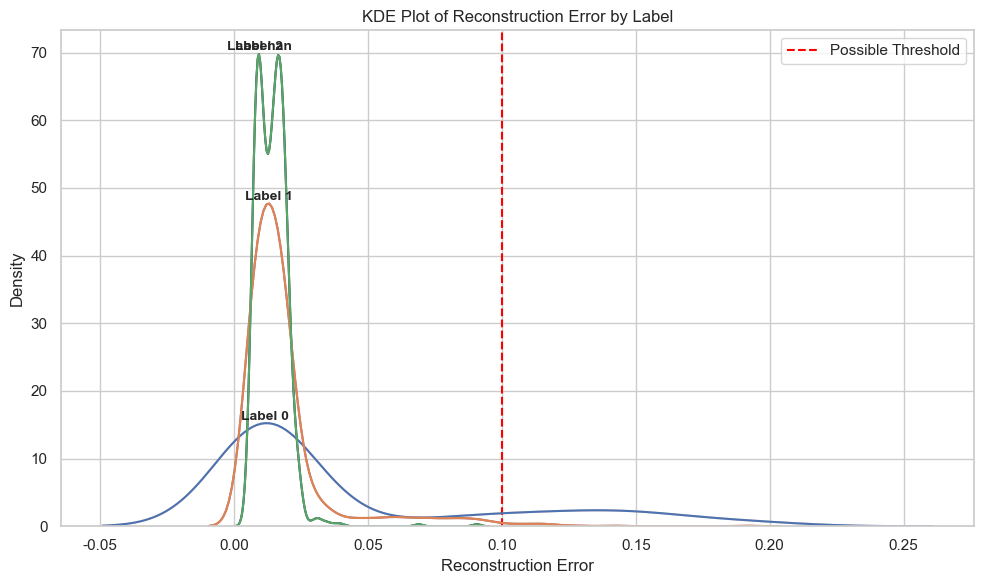

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

plt.figure(figsize=(10, 6))

# KDE plot
sns.kdeplot(data=anomaly_df, x="Reconstruction_Error", hue="True_Label", common_norm=False)

# Threshold 라인
plt.axvline(x=0.1, color='red', linestyle='--', label='Possible Threshold')

# KDE 라벨 수동 표시
for label in sorted(anomaly_df["True_Label"].unique()):
    subset = anomaly_df[anomaly_df["True_Label"] == label]["Reconstruction_Error"]
    kde = sns.kdeplot(subset, bw_adjust=1).get_lines()[-1]
    
    # x, y 데이터 추출
    x_data = kde.get_xdata()
    y_data = kde.get_ydata()
    
    # 최대값 위치에서 레이블 표시
    max_idx = np.argmax(y_data)
    x_peak = x_data[max_idx]
    y_peak = y_data[max_idx]
    
    plt.text(x_peak, y_peak + 0.1, f"Label {label:.0f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

# 기타 설정
plt.legend()
plt.title("KDE Plot of Reconstruction Error by Label")
plt.xlabel("Reconstruction Error")
plt.ylabel("Density")
plt.tight_layout()
plt.show()


In [162]:
anomaly_df_cleaned

,Subject,True_Label,Reconstruction_Error
0,1,1.0,0.009046
1,1,1.0,0.007017
2,1,1.0,0.007809
3,1,1.0,0.007200
4,1,1.0,0.008982
...,...,...,...
2305,56,1.0,0.014550
2306,56,1.0,0.018358
2307,56,1.0,0.017018
2308,56,1.0,0.016305


In [151]:
threshold = 0.0906

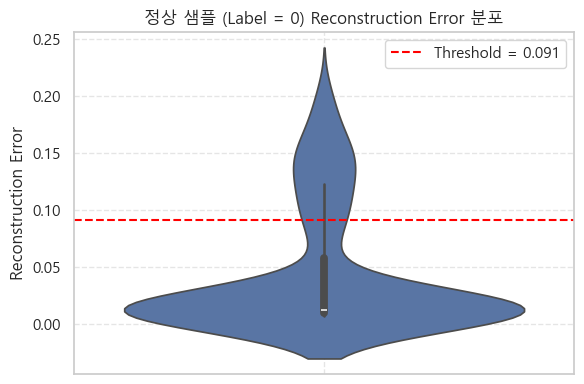

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import matplotlib as mpl

# 한글 폰트 설정 (윈도우 기준)
mpl.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 레이블이 0.0인 정상 샘플만 필터링
normal_df = anomaly_df[anomaly_df['True_Label'] == 0.0]

plt.figure(figsize=(6, 4))
sns.violinplot(y=normal_df['Reconstruction_Error'], inner="box")

# 제목, 라벨, 격자 설정
plt.title("정상 샘플 (Label = 0) Reconstruction Error 분포")
plt.ylabel("Reconstruction Error")
plt.grid(True, linestyle="--", alpha=0.5)

# threshold 값 수평선 표시
plt.axhline(y=threshold, color='red', linestyle='--', linewidth=1.5, label=f'Threshold = {threshold:.3f}')
plt.legend()

plt.tight_layout()
plt.show()



이상 탐지 성공 (TP): 2016건
이상 탐지 실패 (FN): 19건
정상 탐지 성공 (TN): 47건
정상 탐지 실패 (FP): 173건

📊 Precision: 0.8992
📊 Recall:    0.9907
📊 F1-score:  0.9427
📈 AUC:       0.5624


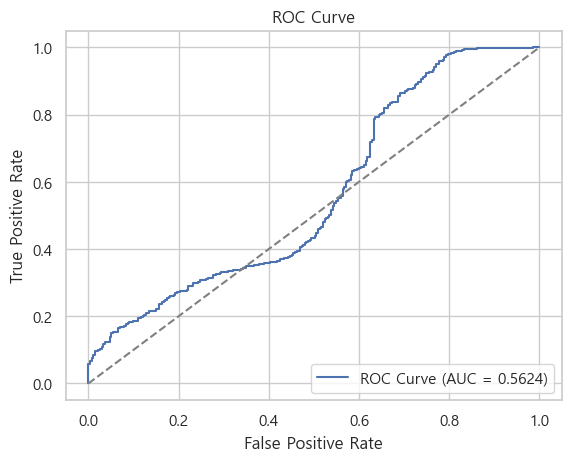

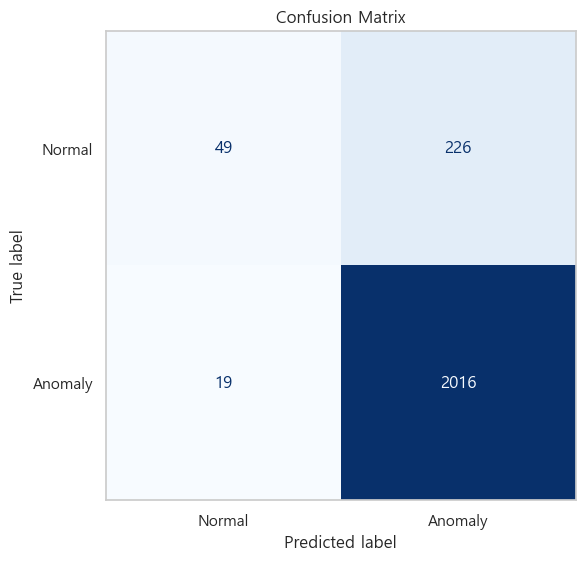

In [153]:
import numpy as np
import pandas as pd
from sklearn.metrics import (
    precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
)
import matplotlib.pyplot as plt

# 이상 탐지 성공 (True Positive): Reconstruction_Error < threshold & Label in [1.0, 2.0]
cond_anomaly_detected = (anomaly_df['Reconstruction_Error'] < threshold) & (anomaly_df['True_Label'].isin([1.0, 2.0]))
anomaly_detected_count = cond_anomaly_detected.sum()

# 이상 탐지 실패 (False Negative): Reconstruction_Error >= threshold & Label in [1.0, 2.0]
cond_anomaly_missed = (anomaly_df['Reconstruction_Error'] >= threshold) & (anomaly_df['True_Label'].isin([1.0, 2.0]))
anomaly_missed_count = cond_anomaly_missed.sum()

# 정상 탐지 성공 (True Negative): Reconstruction_Error >= threshold & Label == 0.0
cond_normal_detected = (anomaly_df['Reconstruction_Error'] >= threshold) & (anomaly_df['True_Label'] == 0.0)
normal_detected_count = cond_normal_detected.sum()

# 정상 탐지 실패 (False Positive): Reconstruction_Error < threshold & Label == 0.0
cond_normal_missed = (anomaly_df['Reconstruction_Error'] < threshold) & (anomaly_df['True_Label'] == 0.0)
normal_missed_count = cond_normal_missed.sum()

# 출력
print(f"이상 탐지 성공 (TP): {anomaly_detected_count}건")
print(f"이상 탐지 실패 (FN): {anomaly_missed_count}건")
print(f"정상 탐지 성공 (TN): {normal_detected_count}건")
print(f"정상 탐지 실패 (FP): {normal_missed_count}건")


# 이진 분류를 위한 예측 라벨 생성 (이상: 1, 정상: 0)
# Reconstruction_Error가 threshold보다 작으면 이상으로 예측 (이상은 재구성 오류가 낮다 가정)
pred_labels = (anomaly_df['Reconstruction_Error'] < threshold).astype(int)
true_labels = anomaly_df['True_Label'].apply(lambda x: 1 if x in [1.0, 2.0] else 0)

# 정밀도, 재현율, F1 점수
precision = precision_score(true_labels, pred_labels)
recall = recall_score(true_labels, pred_labels)
f1 = f1_score(true_labels, pred_labels)
roc_auc = roc_auc_score(true_labels, -anomaly_df['Reconstruction_Error'])  # 낮을수록 이상으로 간주

print(f"\n📊 Precision: {precision:.4f}")
print(f"📊 Recall:    {recall:.4f}")
print(f"📊 F1-score:  {f1:.4f}")
print(f"📈 AUC:       {roc_auc:.4f}")


# ROC Curve 시각화
fpr, tpr, thresholds = roc_curve(true_labels, -anomaly_df['Reconstruction_Error'])  # 이상일수록 값 작음
roc_auc_val = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_val:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix 계산
cm = confusion_matrix(true_labels, pred_labels)

# 시각화 객체 생성 및 출력
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Anomaly"])
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False)  # colorbar 생략 가능

# 제목 및 그리드 설정
ax.set_title("Confusion Matrix")
ax.grid(False)

plt.tight_layout()
plt.show()


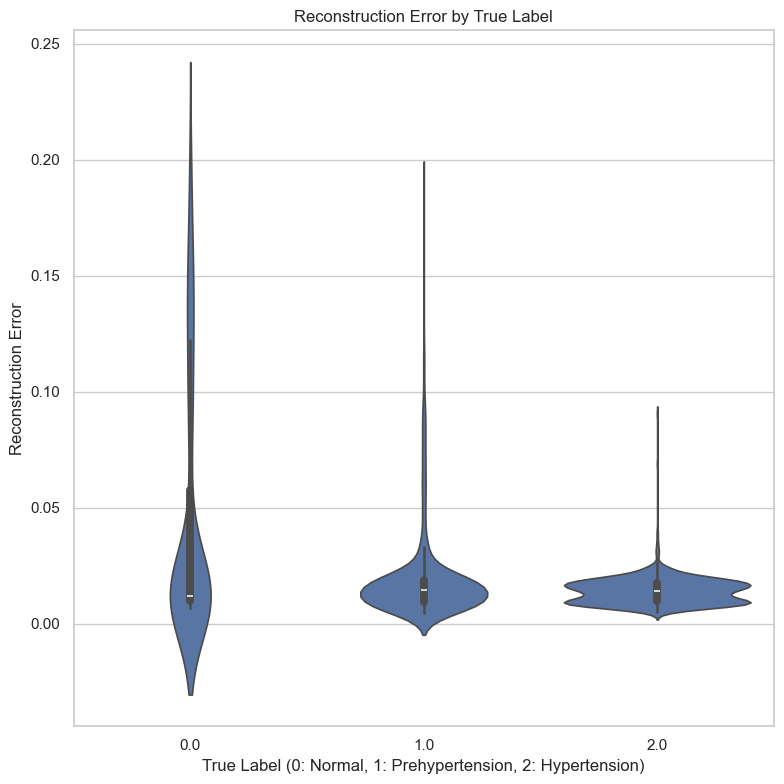

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns

# 스타일 설정
sns.set(style="whitegrid")

# 바이올린 플롯 그리기
plt.figure(figsize=(8, 8))
sns.violinplot(data=anomaly_df, x="True_Label", y="Reconstruction_Error", inner="box")

# 필요 시 임계선 추가
# plt.axhline(y=th, color='red', linestyle='--', label=f'Threshold = {th:.2f}')

# 라벨 및 타이틀 설정
plt.title("Reconstruction Error by True Label")
plt.xlabel("True Label (0: Normal, 1: Prehypertension, 2: Hypertension)")
plt.ylabel("Reconstruction Error")

# 필요 시 로그 스케일
# plt.yscale("log")

plt.tight_layout()
plt.show()


